# <center>Introduction to Pandas</center>

![](https://pandas.pydata.org/_static/pandas_logo.png)


## Installation

Simply,
```
pip install pandas
```


## Reading data from a CSV file

You can read data from a CSV file using the ``read_csv`` function. By default, it assumes that the fields are comma-separated.

In [1]:
# import pandas
import pandas as pd

>The `imdb.csv` dataset contains Highest Rated IMDb "Top 1000" Titles.

In [2]:
# load imdb dataset as pandas dataframe
df = pd.read_csv("data/imdb_1000.csv")

In [3]:
# show first 5 rows of imdb_df
df.head(5) #df.head() anything can be used

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


>The `bikes.csv` dataset contains information about the number of bicycles that used certain bicycle lanes in Montreal in the year 2012.

In [4]:
# load bikes dataset as pandas dataframe
df1 = pd.read_csv("data/bikes.csv",sep=';',parse_dates=True, dayfirst=True)

In [5]:
# show first 3 rows of bikes_df
df1.head(3)

,Date,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
0,01/01/2012,00:00,16,35,51,38,5.0,26,10,0,27.0
1,02/01/2012,00:00,43,83,153,68,11.0,53,6,1,21.0
2,03/01/2012,00:00,58,135,248,104,2.0,89,3,2,15.0


In [6]:
df1["Date"] = pd.to_datetime(df1["Date"],format='%d/%m/%Y')

In [7]:
df1.head(3)

,Date,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
0,2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0
1,2012-01-02,00:00,43,83,153,68,11.0,53,6,1,21.0
2,2012-01-03,00:00,58,135,248,104,2.0,89,3,2,15.0


## Selecting columns

When you read a CSV, you get a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

In [8]:
# list columns of imdb_df
df.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [9]:
# what are the datatypes of values in columns
print(df.dtypes)

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object


In [10]:
# list first 5 movie titles
print(df["title"].head())

0    The Shawshank Redemption
1               The Godfather
2      The Godfather: Part II
3             The Dark Knight
4                Pulp Fiction
Name: title, dtype: object


In [11]:
# show only movie title and genre
col = ["title","genre"]
df[col].head()

,title,genre
0,The Shawshank Redemption,Crime
1,The Godfather,Crime
2,The Godfather: Part II,Crime
3,The Dark Knight,Action
4,Pulp Fiction,Crime


## Understanding columns

On the inside, the type of a column is ``pd.Series`` and pandas Series are internally numpy arrays. If you add ``.values`` to the end of any Series, you'll get its internal **numpy array**.

In [12]:
# show the type of duration column
pd.Series(df["duration"])

0      142
1      175
2      200
3      152
4      154
      ... 
974    116
975    118
976    138
977    114
978    126
Name: duration, Length: 979, dtype: int64

In [13]:
# show duration values of movies as numpy arrays
pd.Series(df["duration"]).values[range(0,9)]

array([142, 175, 200, 152, 154,  96, 161, 201, 195], dtype=int64)

## Applying functions to columns

Use `.apply` function to apply any function to each element of a column.

In [14]:
# convert all the movie titles to uppercase
df["title"].apply(lambda s: s.upper()).head()

0    THE SHAWSHANK REDEMPTION
1               THE GODFATHER
2      THE GODFATHER: PART II
3             THE DARK KNIGHT
4                PULP FICTION
Name: title, dtype: object

## Plotting a column

Use ``.plot()`` function!

In [19]:
df1.columns

Index(['Date', 'Unnamed: 1', 'Rachel / Papineau', 'Berri1', 'Maisonneuve_2',
       'Maisonneuve_1', 'Brébeuf', 'Parc', 'PierDup',
       'CSC (Côte Sainte-Catherine)', 'Pont_Jacques_Cartier'],
      dtype='object')

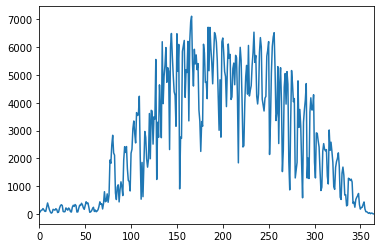

In [16]:
# plot the bikers travelling to Berri1 over the year
df1["Berri1"].plot()

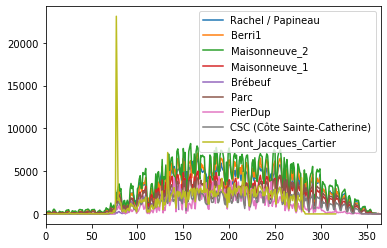

In [22]:
# plot all the columns of bikes_df

# col = []
# for i in df1.columns:
#     col.append(i)
# df1[col].plot()
bikes_df = pd.read_csv("data/bikes.csv",sep=';')
bikes_df.plot() #Anyone can be used

## Value counts

Get count of unique values in a particular column/Series.

In [23]:
# what are the unique genre in imdb_df?
df["genre"].unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

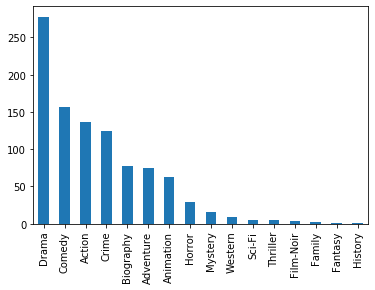

In [25]:
# plotting value counts of unique genres as a bar chart
df["genre"].value_counts().plot(kind="bar")

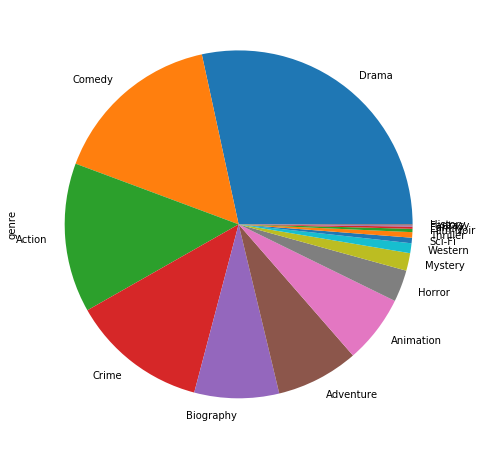

In [24]:
# plotting value counts of unique genres as a pie chart
df["genre"].value_counts().plot(kind="pie",figsize=(10,8))

## Index

### DATAFRAME = COLUMNS + INDEX + ND DATA

### SERIES = INDEX + 1-D DATA

**Index** or (**row labels**) is one of the fundamental data structure of pandas. It can be thought of as an **immutable array** and an **ordered set**.

> Every row is uniquely identified by its index value.

In [26]:
# show index of bikes_df
df1.index

RangeIndex(start=0, stop=366, step=1)

In [27]:
# get row for date 2012-01-01
df1.loc[df1["Date"]=="2012-01-01"]

,Date,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
0,2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0


#### To get row by integer index:

Use ``.iloc[]`` for purely integer-location based indexing for selection by position.

In [28]:
# show 11th row of imdb_df using iloc
df.iloc[11]

star_rating                                                     8.8
title                                                     Inception
content_rating                                                PG-13
genre                                                        Action
duration                                                        148
actors_list       [u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'...
Name: 11, dtype: object

## Selecting rows where column has a particular value

In [29]:
# select only those movies where genre is adventure
df["title"].loc[df["genre"]=="Adventure"]

7          The Lord of the Rings: The Return of the King
10     The Lord of the Rings: The Fellowship of the Ring
14                 The Lord of the Rings: The Two Towers
15                                          Interstellar
54                                    Back to the Future
                             ...                        
936                                            True Grit
937                                            Labyrinth
943                                      The Bucket List
953                                The NeverEnding Story
975                          Back to the Future Part III
Name: title, Length: 75, dtype: object

In [30]:
# which genre has highest number of movies with star rating above 8 and duration more than 130 minutes?
print(df["genre"].value_counts().head(1)) #Here Drama has the highest number of movies
#Now
df.loc[df["genre"]=="Drama"].loc[df["star_rating"]>=8.0].loc[df["duration"]>=130]

Drama    278
Name: genre, dtype: int64


,star_rating,title,content_rating,genre,duration,actors_list
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
13,8.8,Forrest Gump,PG-13,Drama,142,"[u'Tom Hanks', u'Robin Wright', u'Gary Sinise']"
16,8.7,One Flew Over the Cuckoo's Nest,R,Drama,133,"[u'Jack Nicholson', u'Louise Fletcher', u'Mich..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
22,8.7,It's a Wonderful Life,APPROVED,Drama,130,"[u'James Stewart', u'Donna Reed', u'Lionel Bar..."
47,8.5,Taare Zameen Par,PG,Drama,165,"[u'Darsheel Safary', u'Aamir Khan', u'Tanay Ch..."
50,8.5,Cinema Paradiso,R,Drama,155,"[u'Philippe Noiret', u'Enzo Cannavale', u'Anto..."
51,8.5,Apocalypse Now,R,Drama,153,"[u'Martin Sheen', u'Marlon Brando', u'Robert D..."
53,8.5,The Prestige,PG-13,Drama,130,"[u'Christian Bale', u'Hugh Jackman', u'Scarlet..."
56,8.5,The Lives of Others,R,Drama,137,"[u'Ulrich M\xfche', u'Martina Gedeck', u'Sebas..."


## Adding a new column to DataFrame

In [31]:
df1.head()

,Date,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
0,2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0
1,2012-01-02,00:00,43,83,153,68,11.0,53,6,1,21.0
2,2012-01-03,00:00,58,135,248,104,2.0,89,3,2,15.0
3,2012-01-04,00:00,61,144,318,116,2.0,111,8,1,19.0
4,2012-01-05,00:00,95,197,330,124,6.0,97,13,2,16.0


In [32]:
df1.insert(1,"weekday",df1["Date"].dt.weekday_name)

In [33]:
# add a weekday column to bikes_df
df1.head()

,Date,weekday,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
0,2012-01-01,Sunday,00:00,16,35,51,38,5.0,26,10,0,27.0
1,2012-01-02,Monday,00:00,43,83,153,68,11.0,53,6,1,21.0
2,2012-01-03,Tuesday,00:00,58,135,248,104,2.0,89,3,2,15.0
3,2012-01-04,Wednesday,00:00,61,144,318,116,2.0,111,8,1,19.0
4,2012-01-05,Thursday,00:00,95,197,330,124,6.0,97,13,2,16.0


## Deleting an existing column from DataFrame

In [34]:
# remove column 'Unnamed: 1' from bikes_df
df1.drop("Unnamed: 1",axis=1)#use inplace=True for permenant delete

,Date,weekday,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
0,2012-01-01,Sunday,16,35,51,38,5.0,26,10,0,27.0
1,2012-01-02,Monday,43,83,153,68,11.0,53,6,1,21.0
2,2012-01-03,Tuesday,58,135,248,104,2.0,89,3,2,15.0
3,2012-01-04,Wednesday,61,144,318,116,2.0,111,8,1,19.0
4,2012-01-05,Thursday,95,197,330,124,6.0,97,13,2,16.0
...,...,...,...,...,...,...,...,...,...,...,...
361,2012-12-27,Thursday,8,12,7,4,NaN,1,2,0,NaN
362,2012-12-28,Friday,0,35,3,38,NaN,0,0,0,NaN
363,2012-12-29,Saturday,0,27,8,42,NaN,9,0,0,NaN
364,2012-12-30,Sunday,0,5,1,5,NaN,6,0,0,NaN


## Deleting a row in DataFrame

In [35]:
# remove row no. 1 from bikes_df
df1.drop(1,axis=0)

,Date,weekday,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
0,2012-01-01,Sunday,00:00,16,35,51,38,5.0,26,10,0,27.0
2,2012-01-03,Tuesday,00:00,58,135,248,104,2.0,89,3,2,15.0
3,2012-01-04,Wednesday,00:00,61,144,318,116,2.0,111,8,1,19.0
4,2012-01-05,Thursday,00:00,95,197,330,124,6.0,97,13,2,16.0
5,2012-01-06,Friday,00:00,75,146,244,98,4.0,86,4,0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...
361,2012-12-27,Thursday,00:00,8,12,7,4,NaN,1,2,0,NaN
362,2012-12-28,Friday,00:00,0,35,3,38,NaN,0,0,0,NaN
363,2012-12-29,Saturday,00:00,0,27,8,42,NaN,9,0,0,NaN
364,2012-12-30,Sunday,00:00,0,5,1,5,NaN,6,0,0,NaN


## Group By

Any groupby operation involves one of the following operations on the original object. They are −

- Splitting the Object

- Applying a function

- Combining the results

In many situations, we split the data into sets and we apply some functionality on each subset. In the apply functionality, we can perform the following operations −

- **Aggregation** − computing a summary statistic

- **Transformation** − perform some group-specific operation

- **Filtration** − discarding the data with some condition

In [36]:
# group imdb_df by movie genres
dfg = df.groupby(["genre"])
dfg.first()

,star_rating,title,content_rating,duration,actors_list
genre,,,,,
Action,9.0,The Dark Knight,PG-13,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
Adventure,8.9,The Lord of the Rings: The Return of the King,PG-13,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
Animation,8.6,Spirited Away,PG,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."
Biography,8.9,Schindler's List,R,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
Comedy,8.6,Life Is Beautiful,PG-13,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G..."
Crime,9.3,The Shawshank Redemption,R,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
Drama,8.9,12 Angry Men,NOT RATED,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
Family,7.9,E.T. the Extra-Terrestrial,PG,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C..."
Fantasy,7.7,The City of Lost Children,R,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."


In [37]:
# get crime movies group
dfg.get_group("Crime")

,star_rating,title,content_rating,duration,actors_list
0,9.3,The Shawshank Redemption,R,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
4,8.9,Pulp Fiction,R,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
21,8.7,City of God,R,130,"[u'Alexandre Rodrigues', u'Matheus Nachtergael..."
...,...,...,...,...,...
927,7.5,Brick,R,110,"[u'Joseph Gordon-Levitt', u'Lukas Haas', u'Emi..."
931,7.4,Mean Streets,R,112,"[u'Robert De Niro', u'Harvey Keitel', u'David ..."
950,7.4,Bound,R,108,"[u'Jennifer Tilly', u'Gina Gershon', u'Joe Pan..."
969,7.4,Law Abiding Citizen,R,109,"[u'Gerard Butler', u'Jamie Foxx', u'Leslie Bibb']"


In [38]:
# get mean of movie durations for each group
dfg["duration"].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

In [39]:
# change duration of all movies in a particular genre to mean duration of the group


In [40]:
# drop groups/genres that do not have average movie duration greater than 120.

In [41]:
# group weekday wise bikers count
df1g = df1.groupby("weekday")

In [42]:
# get weekday wise biker count

weekday
Friday       AxesSubplot(0.125,0.125;0.775x0.755)
Monday       AxesSubplot(0.125,0.125;0.775x0.755)
Saturday     AxesSubplot(0.125,0.125;0.775x0.755)
Sunday       AxesSubplot(0.125,0.125;0.775x0.755)
Thursday     AxesSubplot(0.125,0.125;0.775x0.755)
Tuesday      AxesSubplot(0.125,0.125;0.775x0.755)
Wednesday    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Berri1, dtype: object

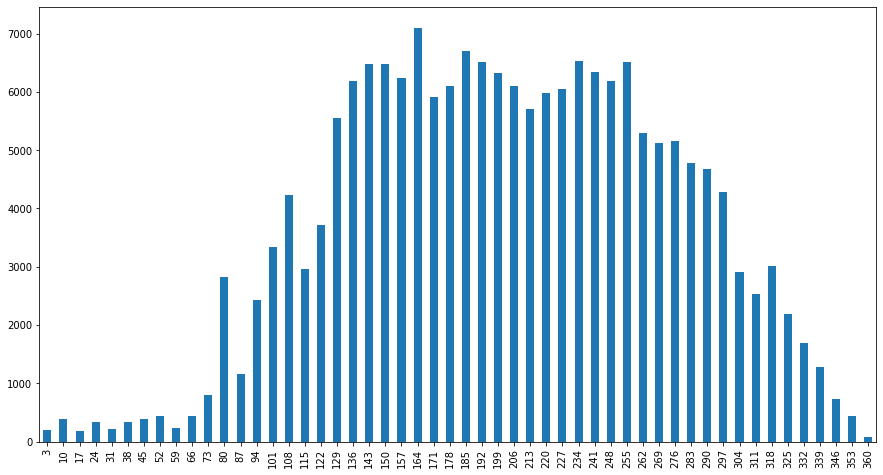

In [43]:
# plot weekday wise biker count for 'Berri1'
df1g['Berri1'].plot(kind="bar",figsize=(15,8))

![](https://memegenerator.net/img/instances/500x/73988569/pythonpandas-is-easy-import-and-go.jpg)